**Цель**: изучить применение дерева решений в рамках задачи регрессии

**Описание задания:**
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

In [19]:
from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import mean_absolute_error

# 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [3]:
df = datasets.fetch_california_housing(as_frame=True).frame
df.shape

(20640, 9)



---



---



---



# 2. Проведите первичный анализ.
*   Проверьте данные на пропуски. Удалите в случае обнаружения.
*   Нормализуйте один из признаков.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков в данных нет

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Мы будем нормализовывать  HouseAge

In [6]:
houseAgeArray = np.array(df['HouseAge'])
houseAgeArray = preprocessing.normalize([houseAgeArray])
df['HouseAge'] = houseAgeArray[0]

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,0.009123,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,0.004673,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,0.011570,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,0.011570,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,0.011570,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422




---



---



---



# 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [8]:
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---



---



---



# 4. Обучите модель регрессии на обучающем множестве

In [9]:
model_log = LinearRegression()
model_log.fit(X_train, y_train)

LinearRegression()



---



---



---



# 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [10]:
model_log_predictions = model_log.predict(X_test)

In [11]:
model_log.score(X_train, y_train)

0.612551191396695

In [12]:
model_log.score(X_test, y_test)

0.5757877060326086

*Точность предсказания на обучающей выборке 0.613, а на тестовой 0.576*



---



---



---



# 6. Обучите дерево решений на обучающем множестве.
*   Повторите п. 5 для полученной модели.
*   Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [13]:
model_tree_1 = DecisionTreeRegressor()
model_tree_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
model_tree_1.score(X_train, y_train)

1.0

In [15]:
model_tree_1.score(X_test, y_test)

0.619987075716515

*Точность предсказания на обучающей выборке 1, а на тестовой 0.62* это может  говорить о переобучении модели

In [16]:
model_tree_1.get_depth()

34

Глубина дерева 34, т.е. мы можем говорить об очень сложном дереве. Поэтому если мы сейчас создадим график, он будет нечитаемый, мы построим его после оптимизации модели

In [ ]:
tree.plot_tree(model_tree_1)



---



---



---



# 7. Оптимизируйте глубину дерева (max_depth). Оптимизируйте ещё один параметр модели на выбор.
*   Повторите п. 5 для полученной модели.

Посмотрим на какой глубине от 1 до 10 дерево даст наилучший результат

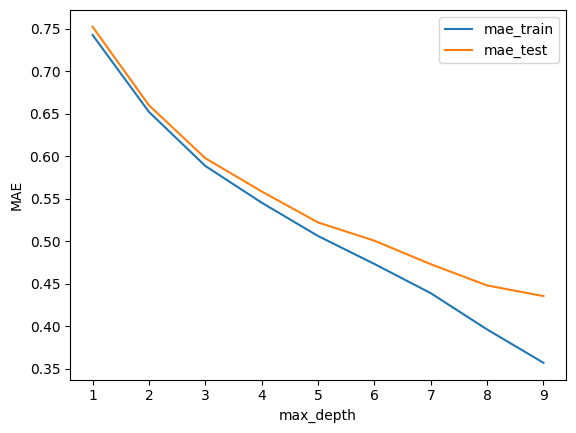

In [33]:
res_2 = []
for param in range(1, 10, 1):
    model_tree_2 = DecisionTreeRegressor(max_depth=param, random_state=42)

    model_tree_2.fit(X_train, y_train)
    pred_train2 = model_tree_2.predict(X_train)
    pred_test2 = model_tree_2.predict(X_test)

    res_2.append([param, mean_absolute_error(pred_train2, y_train), mean_absolute_error(pred_test2, y_test)])

res2_pd = pd.DataFrame(res_2, columns=['max_depth', 'mae_train', 'mae_test'])

res2_pd.set_index('max_depth')['mae_train'].plot(label='mae_train')
res2_pd.set_index('max_depth')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [34]:
res2_pd[res2_pd['mae_test'] == res2_pd['mae_test'].min()]

,max_depth,mae_train,mae_test
8,9,0.357232,0.43568


Давайте попробуем построить дерево с максимальной глубиной 9

In [35]:
model_tree_3 = DecisionTreeRegressor(max_depth=9)
model_tree_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [36]:
model_tree_3.score(X_train, y_train)

0.7999255297501255

In [37]:
model_tree_3.score(X_test, y_test)

0.6859998205373679

Получилось немного повысить точность предсказаний на тестовой выборке, хотя и значение score упало на обучающей выборке, теперь мы не можем говорить о переобучении модели.

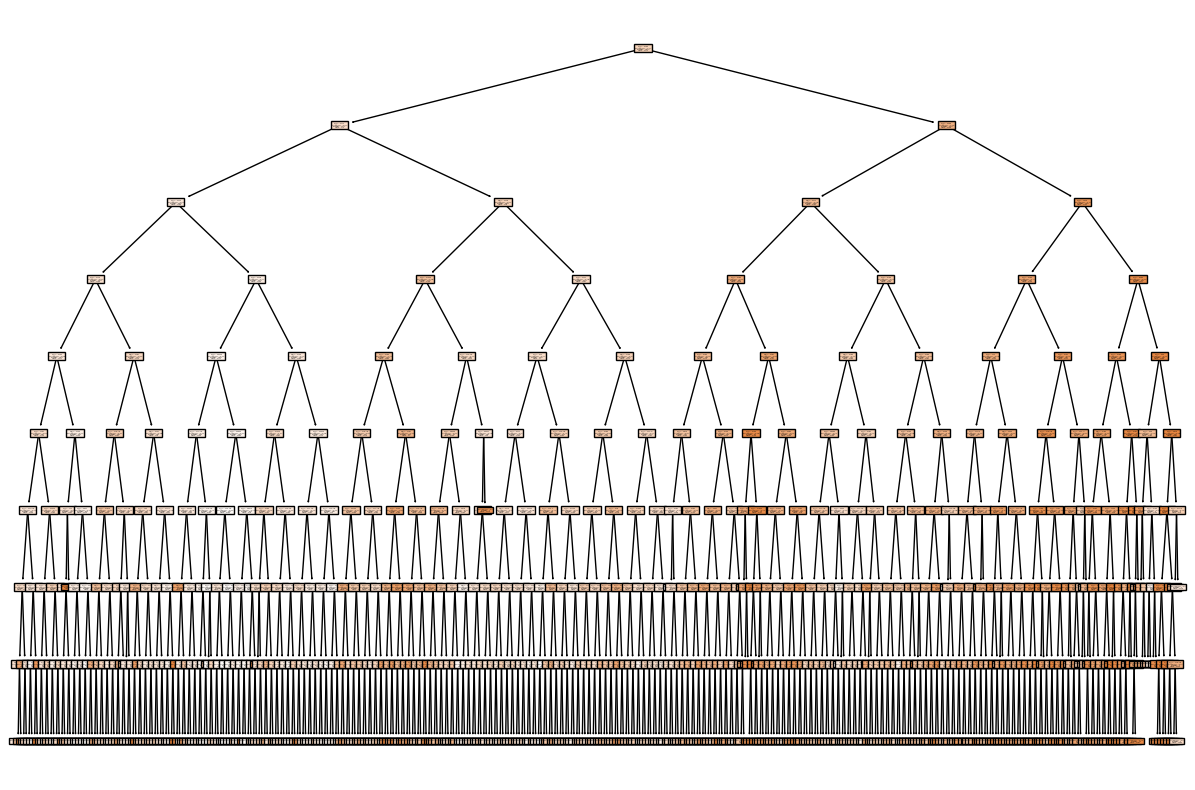

In [44]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model_tree_3, filled=True)

Такое дерево тоже нечитаемо... Попробуем построить дерево глубиной 3

In [39]:
model_tree_4 = DecisionTreeRegressor(max_depth=3)
model_tree_4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [40]:
model_tree_4.score(X_train, y_train)

0.5378979887726012

In [41]:
model_tree_4.score(X_test, y_test)

0.5097629887358219

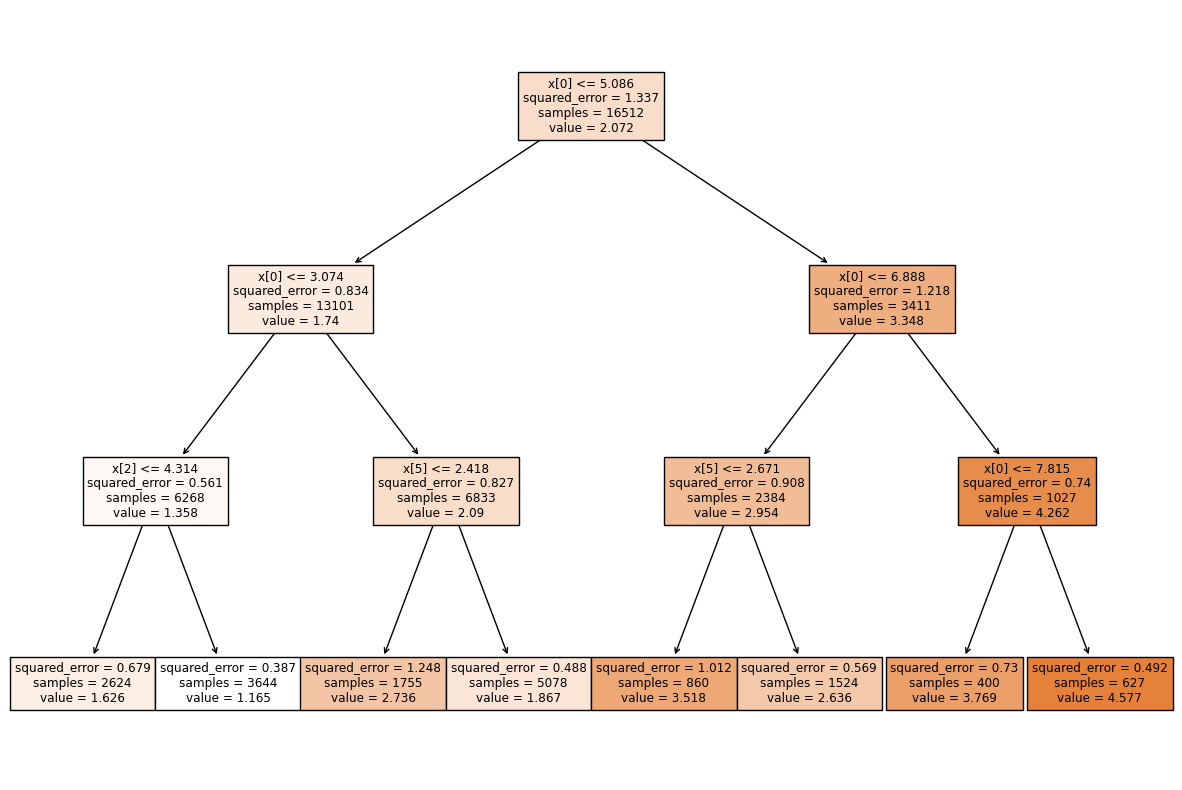

In [43]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model_tree_4, filled=True)

В этом графике уже видно схему построения дерева, однако у такой модели и точность низкая.

Но нам нужно оптимизировать еще какой-либо параметр модели. Возьмем как пример criterion='poisson'

In [48]:
model_tree_5 = DecisionTreeRegressor(max_depth=9, criterion='poisson')
model_tree_5.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=9)

In [49]:
model_tree_5.score(X_train, y_train)

0.8017645524427908

In [50]:
model_tree_5.score(X_test, y_test)

0.6969799829444805

Точность предсказания чуть повысилась, в отличии от criterion='squared_error' по умолчанию



---



---



---



# 8. Сформулируйте выводы по проделанной работе.
*   Сравните точность двух моделей.
*   Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [52]:

tabledata = [["LinearRegression", 0.6126, 0.5758],
            ["DecisionTreeRegressor max_depth=34", 1.0, 0.62],
            ["DecisionTreeRegressor max_depth=9", 0.8, 0.686],
            ["DecisionTreeRegressor max_depth=3", 0.5379, 0.5098],
            ["DecisionTreeRegressor(max_depth=9, criterion='poisson')", 0.8018, 0.697]]

pd.DataFrame(tabledata, columns=["Модель","score на обучающей выборке", "score на тестовой"])


,Модель,score на обучающей выборке,score на тестовой
0,LinearRegression,0.6126,0.5758
1,DecisionTreeRegressor max_depth=34,1.0000,0.6200
2,DecisionTreeRegressor max_depth=9,0.8000,0.6860
3,DecisionTreeRegressor max_depth=3,0.5379,0.5098
4,"DecisionTreeRegressor(max_depth=9, criterion='...",0.8018,0.6970


В отличии от линейной регрессии точность предсказаний дерева решений однозначно выше, кроме модели с глубиной 3, выполненой исключительно для визуализации.

Точность глубокого дерева решений высокая на обучающей выборке, но низкая на тестовой в отличии от дерева решений с глубиной 9. Дерево с глубиной 3 показывает самые низкие результаты даже по сравнению с линейной регрессией.

В общем, обе модели в данном случае можно использовать, однако:
1.   Для линейной регрессии требуется еще прорабатывать датасет, чтобы получить результат лучше.
2.   Дерево решений на глубине 9 показывает оптимальный результат, но чем меньше грубина, тем меньше точность модели. И на глубине 34 дерево решений дает максимальный результат на обучающей выборке и меньше точность на тестовой.

В целом, я думаю что дерево можно применять на более сложных задачах, но как звено цепи в более сложных структурах.